## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

Here is your task:

Download a small (5-15) set of variables of interest.
Write a short description of the data you chose, and why. (1 page)
Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
Produce some numeric summaries and visualizations. (1-3 pages)
Describe your findings in 1-2 pages.
If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:

#
var_list = ['year','educ','age','sex','agekdbrn','wrkstat','hrs1','indus10',
            'prestg10','prestg105plus','marital','martype','cowrksta','sppres10',
            'earnrs','income','income16'] # List of variables you want to save

output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

I ended up keeping 13 variables:
Here are the descriptions copied from the codebook:

EDUC RESPONDENT'S education

AGE RESPONDENT'S age

SEX CODE RESPONDENT'S SEX

AGEKDBRN How old were you when your first child was born?

WRKSTAT Last week were you working full time, part time, going to school, keeping house, or what?

HRS1 - IF WORKING, FULL OR PART TIME: How many hours did you work last week, at all jobs?

PRESTG10 PRESTIGE OF RESPONDENT'S OCCUPATION

MARITAL Are you currently married, widowed, divorced, separated, or have you never been married?

COWRKSTA Last week was your partner working full time, part time, going to school, keeping house, or what?

SPPRES10 PRESTIGE OF RESPONDENT'S SPOUSE'S OCCUPATION

EARNRS  Just thinking about your family now--those people in the household who are related to you . . . How many persons in the family (including yourself) earned any money in [the last year] from any job or employment?

INCOME  In which of these groups did your total family income, from all sources, fall last year before taxes, that is?

YEAR - the year the observation was recorded

INCOME16 In which of these groups did your total family income, from all sources, fall last year? That is, before taxes.

I chose this set of variables because I am mainly interested in the historical changes in female labor force participation over time. How does the prestige of a wife's job compare to that of her husband's? In 1980 vs. in 2010? If a woman has her first child at a younger age, is she less likely to work full-time? Similarly, is there more likely to be one household earner in the past and/or if the woman had children younger? The gender wage gap has narrowed over time and gender roles are changing, but we still see a difference in the "prestige" and pay of male-dominated and female-dominated occupations and industries.  Overall, I am interested to see what patterns emerge in labor force participation for men and women over time and with families.

In [37]:
new_df = pd.read_csv('selected_gss_data.csv')

<ipython-input-37-81782028bffc>:1: DtypeWarning: Columns (11,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('selected_gss_data.csv')


In [38]:
new_df.head(5)

,year,educ,age,sex,agekdbrn,wrkstat,hrs1,indus10,prestg10,prestg105plus,marital,martype,cowrksta,sppres10,earnrs,income,income16
0,1972,16.0,23.0,female,NaN,working full time,NaN,5170.0,45.0,49.0,never married,NaN,NaN,NaN,1.0,NaN,NaN
1,1972,10.0,70.0,male,NaN,retired,NaN,6470.0,50.0,62.0,married,NaN,NaN,NaN,0.0,NaN,NaN
2,1972,12.0,48.0,female,NaN,working part time,NaN,7070.0,49.0,69.0,married,NaN,NaN,41.0,2.0,NaN,NaN
3,1972,17.0,27.0,female,NaN,working full time,NaN,5170.0,60.0,85.0,married,NaN,NaN,39.0,2.0,NaN,NaN
4,1972,12.0,61.0,female,NaN,keeping house,NaN,6680.0,31.0,21.0,married,NaN,NaN,38.0,1.0,NaN,NaN


In [39]:
# I did not include this code to save space, but I described each variable to make sure there were enough non-missing values
# indus10 does not give the information I wanted
# do not need two measures of prestige - dropping prestg105plus
# marital is enough information - dropping martype
# income only goes up to 25000 and income16 seems to be better to use here
new_df.drop(columns=['indus10','prestg105plus','martype','income'], inplace=True)

In [40]:
# renaming variables for clarity
new_df.rename(columns={'agekdbrn':'age_kid_born','hrs1':'hours_worked','prestg10':'occ_prestige',
                       'cowrksta':'spouse_work_status','sppres10':'spouse_prestige','income16':'income'}, inplace=True)

In [41]:
new_df.head()

,year,educ,age,sex,age_kid_born,wrkstat,hours_worked,occ_prestige,marital,spouse_work_status,spouse_prestige,earnrs,income
0,1972,16.0,23.0,female,NaN,working full time,NaN,45.0,never married,NaN,NaN,1.0,NaN
1,1972,10.0,70.0,male,NaN,retired,NaN,50.0,married,NaN,NaN,0.0,NaN
2,1972,12.0,48.0,female,NaN,working part time,NaN,49.0,married,NaN,41.0,2.0,NaN
3,1972,17.0,27.0,female,NaN,working full time,NaN,60.0,married,NaN,39.0,2.0,NaN
4,1972,12.0,61.0,female,NaN,keeping house,NaN,31.0,married,NaN,38.0,1.0,NaN


In [43]:
new_df['income'].value_counts()

,count
income,
"$60,000 to $74,999",1144
"$170,000 or over",1037
"$75,000 to $89,999",935
"$90,000 to $109,999",899
"$50,000 to $59,999",886
"$40,000 to $49,999",854
"$110,000 to $129,999",630
"$30,000 to $34,999",564
"$35,000 to $39,999",515


In [45]:
new_df['income_numeric'] = (
    new_df['income']
    .dropna()  # Remove NaN before processing
    .str.extract(r'(\d[\d,]*)')[0]  # Extract first number
    .str.replace(',', '', regex=True)  # Remove commas
    .astype(float)  # Convert to numeric type
)
# Chat GPT helped me with the code to extract the first number - to make income a numeric variable to get more information
new_df['income_numeric'].describe()

,income_numeric
count,11367.000000
mean,64967.185713
std,49615.518272
min,1000.000000
25%,25000.000000
50%,50000.000000
75%,90000.000000
max,170000.000000


Analysis

In [46]:
new_df['occ_prestige'].groupby(new_df['sex']).describe()
# on average, the occupation prestige of men is slighter higher than women - both mean and median, and at 25% and 75% quartiles

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,36530.0,42.737859,12.902407,16.0,32.0,42.0,50.0,80.0
male,30624.0,43.952717,13.262722,16.0,35.0,43.0,51.0,80.0


In [47]:
new_df['educ'].groupby(new_df['sex']).describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,40179.0,12.938450,3.059162,0.0,12.0,12.0,15.0,20.0
male,31885.0,13.156124,3.324864,0.0,12.0,13.0,16.0,20.0


In [48]:
df_before_1990 = new_df[new_df['year'] < 1990]
df_after_1990 = new_df[new_df['year'] >= 1990]
df_after_2010 = new_df[new_df['year'] >= 2010]
print(df_before_1990['educ'].groupby(df_before_1990['sex']).describe())
print(df_after_1990['educ'].groupby(df_after_1990['sex']).describe())
print(df_after_2010['educ'].groupby(df_after_2010['sex']).describe())

          count       mean       std  min   25%   50%   75%   max
sex                                                              
female  13880.0  11.888833  2.976182  0.0  11.0  12.0  13.0  20.0
male    10936.0  12.234455  3.517711  0.0  11.0  12.0  14.0  20.0
          count       mean       std  min   25%   50%   75%   max
sex                                                              
female  26299.0  13.492414  2.955466  0.0  12.0  13.0  16.0  20.0
male    20949.0  13.637262  3.113110  0.0  12.0  13.0  16.0  20.0
          count       mean       std  min   25%   50%   75%   max
sex                                                              
female  10598.0  13.949236  2.977103  0.0  12.0  14.0  16.0  20.0
male     8580.0  13.984382  3.028325  0.0  12.0  14.0  16.0  20.0


Before 1990, average education was lower for women than men. After 1990, we see the gap closing and getting even narrower after 2010.

[Text(0.5, 1.0, 'Average Education Level Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Education Level')]

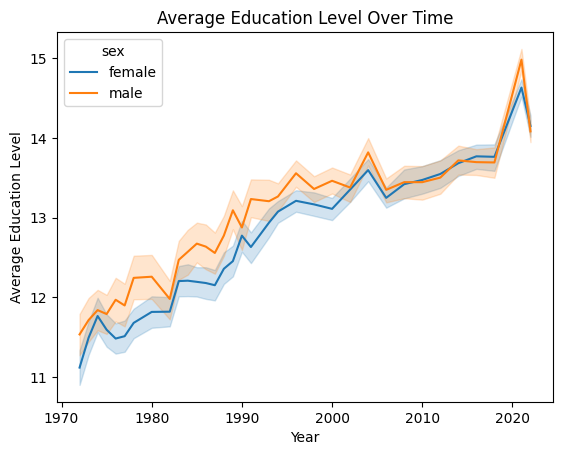

In [84]:
import seaborn as sns # Import Seaborn
avg_education_per_year = new_df.groupby(['year','sex'])['educ'].mean().reset_index()

fig = sns.lineplot(data = new_df, x = 'year', y = 'educ', hue = 'sex')
fig.set(title="Average Education Level Over Time",
        xlabel='Year', ylabel='Average Education Level')

In [70]:
pd.crosstab(df_before_1990['sex'], df_before_1990['wrkstat'])
# before 1990, the gender roles are very stark - more women keeping house, fewer women working full time, and more women working part-time

wrkstat,in school,keeping house,other,retired,"unemployed, laid off, looking for work","with a job, but not at work because of temporary illness, vacation, strike",working full time,working part time
sex,,,,,,,,
female,374,5522,172,1088,206,257,4672,1635
male,353,105,179,1782,571,295,6941,741


In [72]:
pd.crosstab(df_after_2010['sex'], df_after_2010['wrkstat'])
# after 2010, there are still similar trends, but the gaps are closing more
# women have almost caught up to men in working full time
# although women are still much more likely to be keeping house or working part-time than men

wrkstat,in school,keeping house,other,retired,"unemployed, laid off, looking for work","with a job, but not at work because of temporary illness, vacation, strike",working full time,working part time
sex,,,,,,,,
female,331,1563,362,2036,485,260,4254,1320
male,265,247,265,1865,504,152,4590,711


In [53]:
female_df = new_df[new_df['sex'] == "female"]
male_df = new_df[new_df['sex'] == "male"]
first_kid_under_25 = female_df[female_df['age_kid_born'] < 25]
first_kid_over_25 = female_df[female_df['age_kid_born'] >= 25]

print(first_kid_under_25['income_numeric'].groupby(first_kid_under_25['sex']).describe())
print(first_kid_over_25['income_numeric'].groupby(first_kid_over_25['sex']).describe())
# when a woman has her first child under the age of 25, her family income tends to be lower on average
# at the mean, the difference is 81,878 to 46,172 and at the median, the difference is 75,000 to 35,000

         count          mean           std     min      25%      50%      75%  \
sex                                                                             
female  2808.0  46172.720798  39362.974916  1000.0  17500.0  35000.0  60000.0   

             max  
sex               
female  170000.0  
         count          mean           std     min      25%      50%  \
sex                                                                    
female  1803.0  81878.258458  52905.571166  1000.0  40000.0  75000.0   

             75%       max  
sex                         
female  130000.0  170000.0  


In [62]:
married_women = female_df[female_df['marital'] == "married"]
single_women = female_df[female_df['marital'] != "married"] # all else count as "single"
print("Married Women")
print(married_women['income_numeric'].groupby(married_women['sex']).describe())
print("Single Women")
print(single_women['income_numeric'].groupby(single_women['sex']).describe())
# married women have higher family incomes on average

Married Women
         count          mean           std     min      25%      50%  \
sex                                                                    
female  2564.0  84439.547582  49609.545015  1000.0  50000.0  75000.0   

             75%       max  
sex                         
female  130000.0  170000.0  
Single Women
         count          mean           std     min      25%      50%      75%  \
sex                                                                             
female  3603.0  43219.678046  38833.216514  1000.0  15000.0  30000.0  60000.0   

             max  
sex               
female  170000.0  


In [61]:
print("Married Women")
print(married_women['hours_worked'].groupby(married_women['sex']).describe())
print("Single Women")
print(single_women['hours_worked'].groupby(single_women['sex']).describe())
# married women work fewer hours on average than single women

Married Women
         count       mean        std  min   25%   50%   75%   max
sex                                                              
female  9932.0  36.791784  13.568421  0.0  30.0  40.0  40.0  89.0
Single Women
          count       mean        std  min   25%   50%   75%   max
sex                                                               
female  10437.0  38.821117  13.169368  0.0  34.0  40.0  45.0  89.0


[Text(0.5, 1.0, 'Average Hours Worked Over Time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Average Hours Worked Level')]

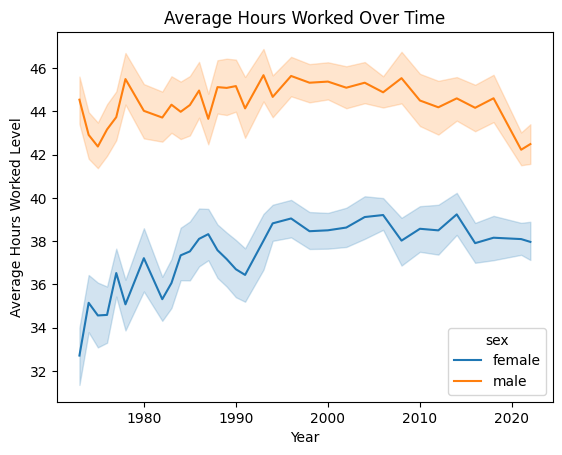

In [85]:
avg_hours_per_year = new_df.groupby(['year','sex'])['hours_worked'].mean().reset_index()

fig = sns.lineplot(data = new_df, x = 'year', y = 'hours_worked', hue = 'sex')
fig.set(title="Average Hours Worked Over Time",
        xlabel='Year', ylabel='Average Hours Worked Level')

In [77]:
print("Married Women")
print(married_women['occ_prestige'].groupby(married_women['sex']).describe())
print("Single Women")
print(single_women['occ_prestige'].groupby(single_women['sex']).describe())
# married women have occupations with higher prestige on average than single women

Married Women
          count       mean        std   min   25%   50%   75%   max
sex                                                                
female  17804.0  43.751404  12.830038  16.0  33.0  45.0  52.0  80.0
Single Women
          count       mean        std   min   25%   50%   75%   max
sex                                                                
female  18726.0  41.774218  12.897524  16.0  31.0  39.0  49.0  80.0


In [63]:
married_men = male_df[male_df['marital'] == "married"]
single_men = male_df[male_df['marital'] != "married"] # all else count as "single"
print("Married Men")
print(married_men['hours_worked'].groupby(married_men['sex']).describe())
print("Single Men")
print(single_men['hours_worked'].groupby(single_men['sex']).describe())
# married men work more hours on average than single men
# this trend is the opposite for women
# these findings align with cultural and societal ideas that men become the provider in a marriage and women retreat from the labor force

Married Men
        count       mean        std  min   25%   50%   75%   max
sex                                                             
male  12366.0  45.682031  13.382209  0.0  40.0  42.0  50.0  89.0
Single Men
       count       mean        std  min   25%   50%   75%   max
sex                                                            
male  8765.0  42.660468  14.757238  0.0  40.0  40.0  50.0  89.0


In [78]:
print("Married Men")
print(married_men['occ_prestige'].groupby(married_men['sex']).describe())
print("Single Men")
print(single_men['occ_prestige'].groupby(single_men['sex']).describe())
# married men have higher occupation prestige than single men on average
# this is consistent with societal providership norms

Married Men
        count       mean        std   min   25%   50%   75%   max
sex                                                              
male  17403.0  45.636327  13.210933  16.0  35.0  45.0  53.0  80.0
Single Men
        count       mean        std   min   25%   50%   75%   max
sex                                                              
male  13221.0  41.736555  13.002872  16.0  32.0  39.0  49.0  80.0


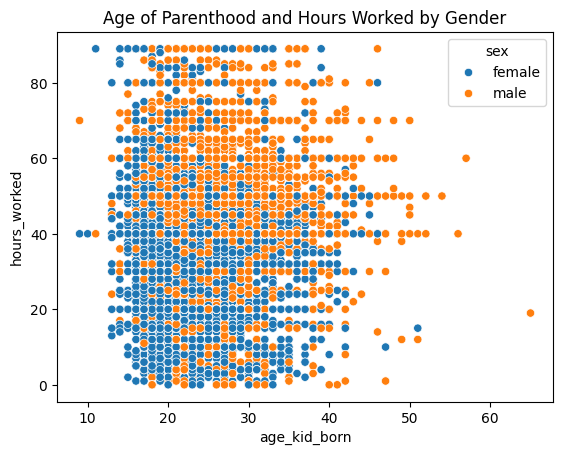

In [91]:
var1 = 'hours_worked' # A numeric variable
var2 = 'age_kid_born' # Another numeric
cat1 = 'sex' # A categorical variable

sns.scatterplot(data=new_df, x=var2, y=var1, hue=cat1).set(title='Age of Parenthood and Hours Worked by Gender')
plt.show() # Our initial plot

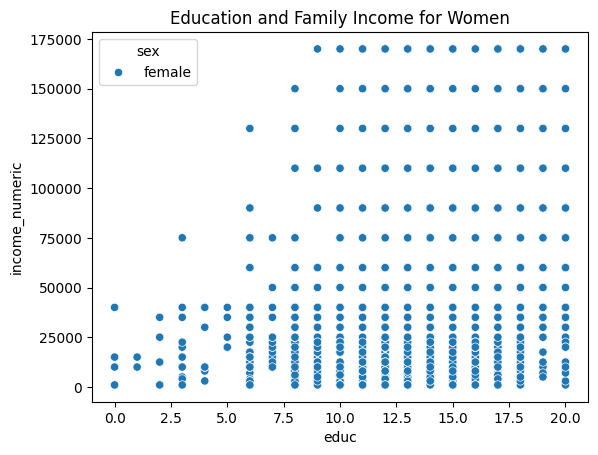

In [99]:
var1 = 'educ' # A numeric variable
var2 = 'income_numeric' # Another numeric

sns.scatterplot(data=female_df, x=var1, y=var2, hue=cat1).set(title='Education and Family Income for Women')
plt.show() # Our initial plot
# this plot shows the important of education on family income for women